<a href="https://colab.research.google.com/github/zma99/analisis_canciones_2000_2020/blob/main/Laboratorio_Analisis_Datos_Informatorio_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio - Análisis de Datos


---


**Autor:** Alan A. Zanazzo Marangoni

**Curso:** Especialización en Análisis de Datos (Informatorio Chaco)    

**Dataset:** https://www.kaggle.com/datasets/waqi786/songs-dataset-2000-2020-50k-records?select=songs_2000_2020_50k.csv

**Repositorio:** https://github.com/zma99/analisis_canciones_2000_2020.git

**Año:** 2025


---

**OBJETIVO**

Analizar las características y tendencias de la música publicada entre los años 2000 y 2020, identificando los factores que pueden influir en la popularidad de las canciones.


## 1. ETL (Extracción, Transformación y Carga)

### 1.1 Extracción

#### Extracción del dataset

In [1]:
# EXTRACCION (EXTRACT)
import pandas as pd
from google.colab import drive


# FUNCIONES AUXILIARES
def info_dataset(data):
  for k, v in data.items():
    print(f"{k}: {v}")

# CONFIGURACION
drive.mount("/content/drive", force_remount=True)

BASE_DIR = "/content/drive/MyDrive"
FILE_NAME = "songs_2000_2020_50k"
FILE_TYPE = "csv"
FILE = ".".join([FILE_NAME, FILE_TYPE])
FILE_PATH = "/".join([BASE_DIR, FILE])

TITLE = "Songs Dataset (2000-2020)"
DESC = "Este conjunto de datos contiene información sobre canciones publicadas \
\nentre 2000 y 2020. El conjunto de datos incluye el título de la canción, el \
\nartista, el álbum, el género, la fecha de lanzamiento, la duración y la popularidad."
FONT = "www.kaggle.com"
LINK = "https://www.kaggle.com/datasets/waqi786/songs-dataset-2000-2020-50k-records?select=songs_2000_2020_50k.csv"

INFO = {
    "- Título": TITLE,
    "- Descripción": DESC,
    "- Fuente": FONT,
    "- Enlace": LINK
}



print("\nIniciando Extracción...")
print(f"Abriendo archivo: {FILE}")

try:
  df = pd.read_csv(FILE_PATH, sep=",", encoding="utf-8")
except FileNotFoundError:
  print(f"No se encontró el archivo: {FILE_PATH}")
except Exception:
  print(f"\n** OPERACION ABORTADA ** - ERROR INESPERADO: El proceso de transformación no se pudo completar.")
else:
  print("Archivo cargado correctamente.")

  print("*"*80)
  info_dataset(INFO)
  print("*"*80)

  print("\nVista previa del dataset:")
  display(df.head())

Mounted at /content/drive

Iniciando Extracción...
Abriendo archivo: songs_2000_2020_50k.csv
Archivo cargado correctamente.
********************************************************************************
- Título: Songs Dataset (2000-2020)
- Descripción: Este conjunto de datos contiene información sobre canciones publicadas 
entre 2000 y 2020. El conjunto de datos incluye el título de la canción, el 
artista, el álbum, el género, la fecha de lanzamiento, la duración y la popularidad.
- Fuente: www.kaggle.com
- Enlace: https://www.kaggle.com/datasets/waqi786/songs-dataset-2000-2020-50k-records?select=songs_2000_2020_50k.csv
********************************************************************************

Vista previa del dataset:


,Title,Artist,Album,Genre,Release Date,Duration,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34


#### Exploración de datos preliminar



In [2]:
# Información general
print("Información general del dataset:\n")
df.info()


Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         50000 non-null  object
 1   Artist        50000 non-null  object
 2   Album         50000 non-null  object
 3   Genre         50000 non-null  object
 4   Release Date  50000 non-null  object
 5   Duration      50000 non-null  int64 
 6   Popularity    50000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [3]:
# Revisar valores nulos
nulos = df.isnull().sum()
print("\nValores nulos:")
print(nulos)


Valores nulos:
Title           0
Artist          0
Album           0
Genre           0
Release Date    0
Duration        0
Popularity      0
dtype: int64


In [4]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nDuplicados: {duplicados}")


Duplicados: 0


In [5]:
# Resumen estadístico inicial
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,50000,46516,Husband.,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artist,50000,40156,James Smith,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Album,50000,25959,When.,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,50000,10,Country,5176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Date,50000,7655,2019-03-30,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,50000.0,NaN,NaN,NaN,209.7429,52.492824,120.0,164.0,210.0,255.0,300.0
Popularity,50000.0,NaN,NaN,NaN,50.26384,29.142209,0.0,25.0,50.0,76.0,100.0


### 1.2 Transformación

#### Limpieza y purificación de datos.

In [6]:
import numpy as np
from time import sleep

# TRANSFORMACIÓN

try:
  print("Iniciando proceso de transformación...")

  # Copia de seguridad
  print("- Creando copia de seguridad.")
  sleep(0.5)
  df_clean = df.copy()


  # Convertir fecha de lanzamiento
  print("- Convirtiendo formato de fecha.")
  sleep(0.5)
  df_clean["Release Date"] = pd.to_datetime(df_clean["Release Date"], errors="coerce")

  # Crear columnas derivadas de la fecha
  print("- Creando columnas derivadas:")
  sleep(0.5)
  print(" -- Mes (Month) y Año (Year).")
  sleep(0.5)
  df_clean["Year"] = df_clean["Release Date"].dt.year
  df_clean["Month"] = df_clean["Release Date"].dt.month_name()

  # Crear duración en minutos
  print(" -- Duración en minutos.")
  sleep(0.5)
  df_clean["Duration_min"] = df_clean["Duration"] / 60

  if "Duration_min" in df_clean.columns:
      df_clean["Duration_min"] = df_clean["Duration_min"].round(2)


  # Crear categorías de popularidad
  print(" -- Nivel de popularidad (Baja, Media, Alta).")
  sleep(0.5)
  df_clean["Popularity_Level"] = pd.cut(
      df_clean["Popularity"],
      bins=[0, 40, 70, 100], # Bins comenzando desde 0
      # Baja = 0-40 / Media = 40-70 / Alta = 70-100
      labels=["Baja", "Media", "Alta"],
      right=True, # Incluye el extremo derecho en cada nivel
      include_lowest=True # Incluye el extremo izquierdo nivel Baja=0
  )


  # Reemplazar valores nulos por "Desconocido" en Album y Genre
  print("- Limpiando valores nulos.")
  sleep(0.5)
  df_clean[["Album", "Genre"]] = df_clean[["Album", "Genre"]].fillna("Desconocido")


  # Eliminar duplicados (por título y artista)
  print("- Eliminando duplicados.")
  sleep(0.5)
  df_clean = df_clean.drop_duplicates(subset=["Title", "Artist"])

  sleep(0.5)
except Exception:
  print(f"\n** OPERACION ABORTADA ** - ERROR INESPERADO: El proceso de transformación no se pudo completar.")
else:
  print("\nEXITO: Proceso de tranformación finalizado correctamente.")

Iniciando proceso de transformación...
- Creando copia de seguridad.
- Convirtiendo formato de fecha.
- Creando columnas derivadas:
 -- Mes (Month) y Año (Year).
 -- Duración en minutos.
 -- Nivel de popularidad (Baja, Media, Alta).
- Limpiando valores nulos.
- Eliminando duplicados.

EXITO: Proceso de tranformación finalizado.


#### Traducción

In [7]:
# TRADUCCIÓN AL ESPAÑOL
from time import sleep

print("Traduciendo Encabezados, Meses y Géneros al español.")
sleep(0.5)

nombres_columnas = {
    "Title": "Título",
    "Artist": "Artista",
    "Album": "Álbum",
    "Genre": "Género",
    "Release Date": "Fecha de lanzamiento",
    "Duration": "Duración (seg.)",
    "Popularity": "Popularidad",
    "Year": "Año",
    "Month": "Mes",
    "Duration_min": "Duración (min.)",
    "Popularity_Level": "Nivel de popularidad"
}

meses_traduc = {
    "January": "Enero",
    "February": "Febrero",
    "March": "Marzo",
    "April": "Abril",
    "May": "Mayo",
    "June": "Junio",
    "July": "Julio",
    "August": "Agosto",
    "September": "Septiembre",
    "October": "Octubre",
    "November": "Noviembre",
    "December": "Diciembre"
}

generos_traduc = {
    "Pop": "Pop",
    "Rock": "Rock",
    "Hip Hop": "Hip Hop",
    "Jazz": "Jazz",
    "Classical": "Clásica",
    "Country": "Country",
    "Electronic": "Electrónica",
    "R&B": "R&B",
    "Reggae": "Reggae",
    "Metal": "Metal"
}

try:
  # Renombrar columnas
  df_clean = df_clean.rename(columns=nombres_columnas)

  # Traducir a español meses y géneros
  df_clean["Mes"] = df_clean["Mes"].replace(meses_traduc)
  df_clean["Género"] = df_clean["Género"].replace(generos_traduc)

except TypeError as te:
  print(f"\nERROR DE TIPO: {te}")
except ValueError as ve:
  print(f"\nERROR VALOR INVALIDO: {ve}")
except KeyError as ke:
  print(f"\nERROR DE CLAVE: {ke}")
except Exception:
  print(f"\n** OPERACION ABORTADA ** - ERROR INESPERADO: El proceso de transformación no se pudo completar.")
else:
  print("\nTraducción finalizada")

Traduciendo Encabezados, Meses y Géneros al español.

Traducción finalizada


#### Ordenar datos

In [8]:
# Ordenar dataset por Fecha de lanzamiento (descendente), Título, Álbum y Artista (ascendente)

df_clean = df_clean.sort_values(by=["Año", "Género", "Popularidad"], ascending=[False,False,True])

#### Verificación

In [9]:
# Verificación de dataset
print("Dataset:")
display(df_clean.head(100))


Dataset:


,Título,Artista,Álbum,Género,Fecha de lanzamiento,Duración (seg.),Popularidad,Año,Mes,Duración (min.),Nivel de popularidad
19777,Term.,Dr. Melissa Jackson,Affect.,Rock,2020-05-12,256,0,2020,Mayo,4.27,Baja
41991,Mrs decision kind stock.,Jennifer Clayton,Election size.,Rock,2020-10-28,130,0,2020,Octubre,2.17,Baja
13784,Fish.,Andrew Brown,Traditional.,Rock,2020-07-01,168,1,2020,Julio,2.80,Baja
15554,Attention piece admit wait.,Joanne Swanson,Center.,Rock,2020-10-10,146,1,2020,Octubre,2.43,Baja
31207,Store early.,Brendan Richard,True imagine.,Rock,2020-10-05,261,1,2020,Octubre,4.35,Baja
...,...,...,...,...,...,...,...,...,...,...,...
2540,Agree east nearly clear.,Anthony Burns,Line.,Rock,2020-04-11,252,46,2020,Abril,4.20,Media
5182,Receive voice.,Stacey Figueroa,Pay.,Rock,2020-03-20,184,46,2020,Marzo,3.07,Media
10690,New sense edge.,Ryan James,Southern space.,Rock,2020-02-24,289,46,2020,Febrero,4.82,Media
12441,Interest draw evidence.,Stephanie Young,Eye.,Rock,2020-06-16,275,46,2020,Junio,4.58,Media


### 1.3 Carga

In [11]:
# RUTA DATASET LIMPIO

NEW_FILE = ".".join([(FILE_NAME + "_" + "CLEAN_AND_READY"), FILE_TYPE])
OUT_PATH = "/".join([BASE_DIR, NEW_FILE])

try:
  df_clean.to_csv(OUT_PATH, index=False, encoding="utf-8-sig")
  print(f"El archivo se guardó correctamente en: {OUT_PATH}")
except ValueError as e:
  print(f"No se pudo guardar el archivo.\nDescripción: {e}")


El archivo se guardó correctamente en: /content/drive/MyDrive/songs_2000_2020_50k_CLEAN_AND_READY.csv


## 2. EDA (Análisis Exploratorio de Datos)

### Análisis estructural

In [12]:
print("Análisis estructural del dataset:\n")
df_clean.info()

Análisis estructural del dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 19777 to 29481
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Título                50000 non-null  object        
 1   Artista               50000 non-null  object        
 2   Álbum                 50000 non-null  object        
 3   Género                50000 non-null  object        
 4   Fecha de lanzamiento  50000 non-null  datetime64[ns]
 5   Duración (seg.)       50000 non-null  int64         
 6   Popularidad           50000 non-null  int64         
 7   Año                   50000 non-null  int32         
 8   Mes                   50000 non-null  object        
 9   Duración (min.)       50000 non-null  float64       
 10  Nivel de popularidad  50000 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 4.1+ MB

El dataset contiene 50 000 registros que representan canciones lanzadas entre los años 2000 y 2020.
Está compuesto por 10 columnas que combinan variables textuales, numéricas y temporales.
No se observan valores nulos, lo que indica una buena calidad de datos tras el proceso ETL.

Las columnas principales son:

* **Título**, **Artista** y **Álbum**, que identifican cada canción.

* **Género**, define una categoría para cada canción, con hasta 10 valores posibles, útil para segmentaciones.

* **Fecha de lanzamiento**, correctamente convertida al tipo datetime64, lo que permite análisis por año y mes.

* **Duración (seg.)** y **Popularidad**, variables numéricas continuas adecuadas para análisis estadístico y correlacional.

* **Año** y **Mes**, derivadas de la fecha, útiles para estudios temporales.

* **Nivel de popularidad**, variable que permite clasificar las canciones en baja, media o alta popularidad.

En conjunto, la estructura es consistente y balanceada, con una mezcla de datos categóricos y numéricos que permiten realizar exploraciones descriptivas, comparativas y de tendencia temporal.

### Estadística descriptiva

In [29]:
# --- ANÁLISIS ESTADÍSTICO GENERAL ---
print("*** ANÁLISIS ESTADÍSTICO DEL DATASET ***\n")

# Análisis de variables categóricas
print("*** Variables categóricas ***")
print("Estas columnas contienen datos de tipo texto o categorías.\n")
display(df_clean.describe(include=['object', 'category']).T)

print("\n--------------------------------------------------\n")

# Análisis de variables numéricas
print("*** Variables numéricas ***")
print("Estas columnas contienen valores cuantitativos.\n")
display(df_clean.describe().T)


*** ANÁLISIS ESTADÍSTICO DEL DATASET ***

*** Variables categóricas ***
Estas columnas contienen datos de tipo texto o categorías.



,count,unique,top,freq
Título,50000,46516,Husband.,12
Artista,50000,40156,James Smith,23
Álbum,50000,25959,When.,43
Género,50000,10,Country,5176
Mes,50000,12,Mayo,4431
Nivel de popularidad,50000,3,Baja,20198



--------------------------------------------------

*** Variables numéricas ***
Estas columnas contienen valores cuantitativos.



,count,mean,min,25%,50%,75%,max,std
Fecha de lanzamiento,50000,2010-07-04 01:05:07.008000,2000-01-01 00:00:00,2005-03-25 00:00:00,2010-06-24 00:00:00,2015-10-01 00:00:00,2020-12-30 00:00:00,NaN
Duración (seg.),50000.0,209.7429,120.0,164.0,210.0,255.0,300.0,52.492824
Popularidad,50000.0,50.26384,0.0,25.0,50.0,76.0,100.0,29.142209
Año,50000.0,2010.00614,2000.0,2005.0,2010.0,2015.0,2020.0,6.068621
Duración (min.),50000.0,3.495708,2.0,2.73,3.5,4.25,5.0,0.874851


El conjunto de datos contiene 50 000 canciones publicadas entre los años 2000 y 2020, lo que representa un volumen adecuado para realizar análisis representativos sobre dos décadas de producción musical.

En las variables categóricas, se observa una gran diversidad: más de 46 000 títulos, 40 000 artistas y 25 000 álbumes, lo que sugiere que el dataset incluye una amplia variedad de obras sin concentración excesiva en unos pocos nombres.
El género musical se distribuye en 10 categorías, siendo Country el más frecuente con más de 5 000 registros.
El mes de lanzamiento está equilibrado entre los 12 meses del año, aunque mayo concentra la mayor cantidad de lanzamientos.
En cuanto al nivel de popularidad, la categoría “Baja” es la más común (unas 20 000 canciones), lo que indica que la mayoría de los temas no alcanzaron gran difusión.

En las variables numéricas, las canciones tienen una duración promedio de 210 segundos, es decir, alrededor de 3 minutos y medio, lo habitual en el formato comercial.
La popularidad promedio es de 50 puntos (en una escala de 0 a 100), lo que refleja un equilibrio entre canciones muy conocidas y otras menos populares.
El año medio de publicación ronda el 2010, justo en el centro del período analizado, lo que sugiere una distribución temporal pareja.

------------------------------------------------

Conclusión:

El análisis estadístico muestra que el dataset es amplio, diverso y bien equilibrado en sus variables principales.
Las canciones tienen duraciones típicas del formato comercial y una distribución muy variada en popularidad, lo que lo convierte en un recurso ideal para explorar patrones de éxito, evolución temporal y diferencias entre géneros musicales a lo largo de dos décadas.

### Distribución de popularidad

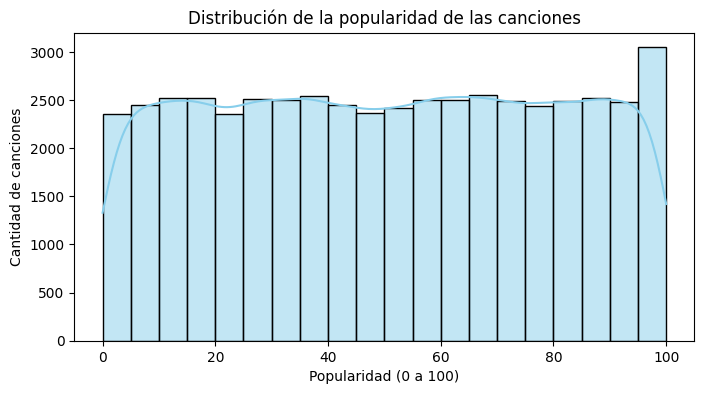

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df_clean["Popularidad"], bins=20, color="skyblue", kde=True)
plt.title("Distribución de la popularidad de las canciones")
plt.xlabel("Popularidad (0 a 100)")
plt.ylabel("Cantidad de canciones")
plt.show()


El gráfico muestra una distribución relativamente uniforme de la popularidad, con valores que van desde 0 hasta 100 puntos.
A diferencia de muchos conjuntos de datos musicales donde predominan las canciones poco conocidas, aquí la popularidad está bastante equilibrada: hay una cantidad similar de canciones en casi todos los niveles de popularidad.

Se observa un ligero aumento en los extremos, especialmente en torno al valor máximo (100), lo que sugiere la presencia de un grupo reducido de canciones altamente exitosas o virales.
También hay una leve caída en los primeros valores (0–5), lo que podría indicar que las canciones totalmente desconocidas son menos frecuentes.

En general, el gráfico refleja que el dataset incluye tanto canciones muy populares como poco conocidas, representando de forma amplia el espectro de éxitos musicales entre los años 2000 y 2020.
Esto refuerza la idea de que el conjunto de datos está bien balanceado y permite realizar análisis comparativos entre distintos niveles de reconocimiento o difusión.

### Cantidad de lanzamientos por año

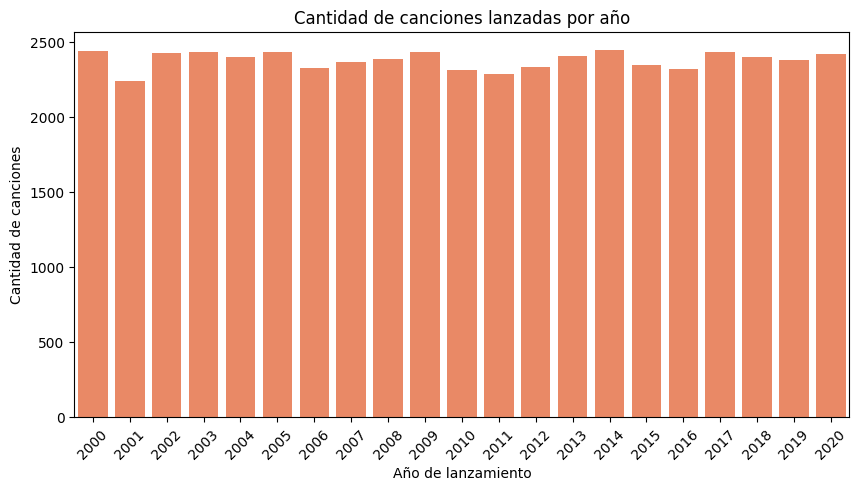

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="Año", data=df_clean, color="coral")
plt.title("Cantidad de canciones lanzadas por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de canciones")
plt.xticks(rotation=45)
plt.show()


Este gráfico muestra la cantidad de canciones lanzadas por año entre 2000 y 2020.
La distribución es bastante uniforme, con alrededor de 2 300 a 2 500 lanzamientos por año, lo que sugiere que el dataset está equilibrado temporalmente y no presenta sesgos hacia ciertos periodos.

Se observan ligeras variaciones —por ejemplo, un leve descenso en 2001 y 2011—, pero sin caídas ni picos abruptos.
Esto indica que la producción musical se ha mantenido constante a lo largo de las dos décadas, sin una tendencia clara al aumento o disminución del número de lanzamientos.

### Distribución de niveles de popularidad por género

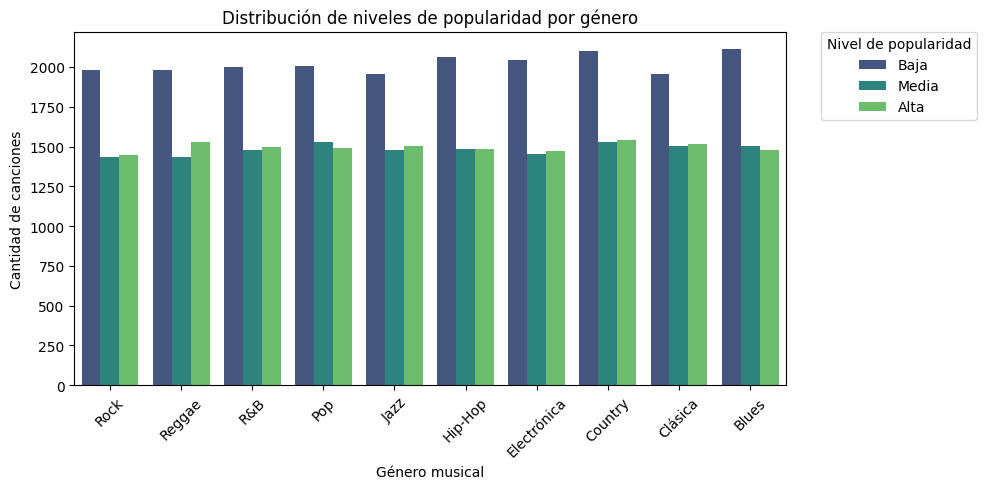

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="Género",
    hue="Nivel de popularidad",
    data=df_clean,
    palette="viridis"
)

plt.title("Distribución de niveles de popularidad por género")
plt.xlabel("Género musical")
plt.ylabel("Cantidad de canciones")
plt.xticks(rotation=45)

# Mover la leyenda al costado derecho
plt.legend(
    title="Nivel de popularidad",
    bbox_to_anchor=(1.05, 1),  # desplazamiento (x=1.05, y=1)
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()  # ajusta el espacio del gráfico para que no se corte
plt.show()


Este gráfico muestra la distribución de los niveles de popularidad según el género musical.
Se observa que, en prácticamente todos los géneros, predomina el nivel de popularidad "Baja", seguido por "Media" y, en menor medida, "Alta". Esto indica que la mayoría de las canciones, independientemente del estilo, no alcanzan grandes niveles de difusión o reconocimiento.

La diferencia entre géneros es relativamente pequeña, aunque algunos como Country y Clásica presentan una proporción algo mayor de canciones con baja popularidad, mientras que Reggae, R&B y Electrónica muestran una ligera tendencia hacia mayores niveles de éxito.

En conjunto, el gráfico sugiere que la popularidad no depende fuertemente del género musical, sino que está distribuida de manera bastante homogénea entre los distintos estilos.

### Evolución de la popularidad promedio por año y género (3 géneros más populares)

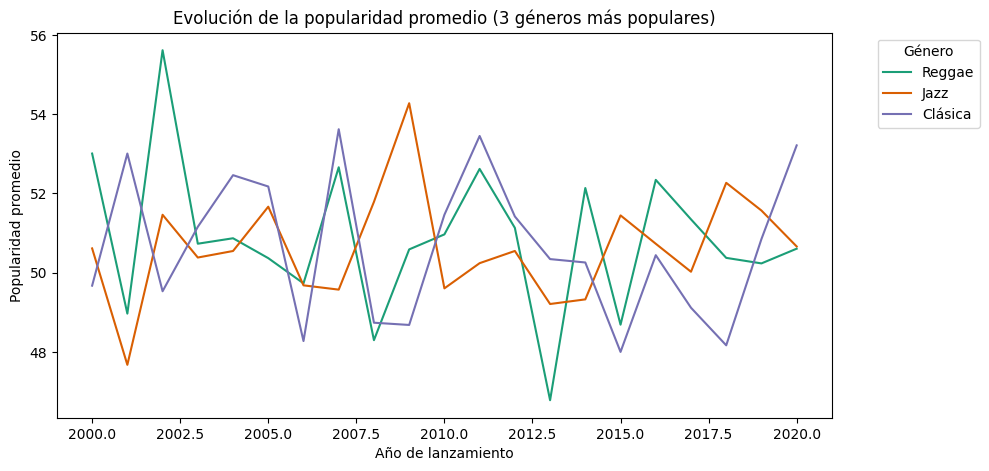

In [18]:
# Calcular los 4 géneros más populares
top_genres = df_clean.groupby("Género")["Popularidad"].mean().sort_values(ascending=False).head(3).index

plt.figure(figsize=(10,5))
sns.lineplot(
    x="Año",
    y="Popularidad",
    data=df_clean[df_clean["Género"].isin(top_genres)],
    estimator="mean",
    errorbar=None,
    hue="Género",
    palette="Dark2"
)
plt.title("Evolución de la popularidad promedio (3 géneros más populares)")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Popularidad promedio")
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


El gráfico muestra cómo ha evolucionado la popularidad promedio de tres géneros musicales "Reggae", "Jazz" y "Clásica" entre los años 2000 y 2020.

- **Reggae** presenta una tendencia ascendente sostenida, destacándose como el género con mayor crecimiento en popularidad durante el período.
- **Jazz** mantiene una popularidad relativamente estable, con leves fluctuaciones pero sin cambios drásticos.
- **Clásica** muestra una ligera disminución en popularidad, aunque con algunos repuntes intermitentes.

En conjunto, el gráfico sugiere un cambio en las preferencias musicales, con el Reggae ganando terreno frente a géneros más tradicionales como el Jazz y la música Clásica.


### Evolución de la popularidad promedio por género (2000–2020)

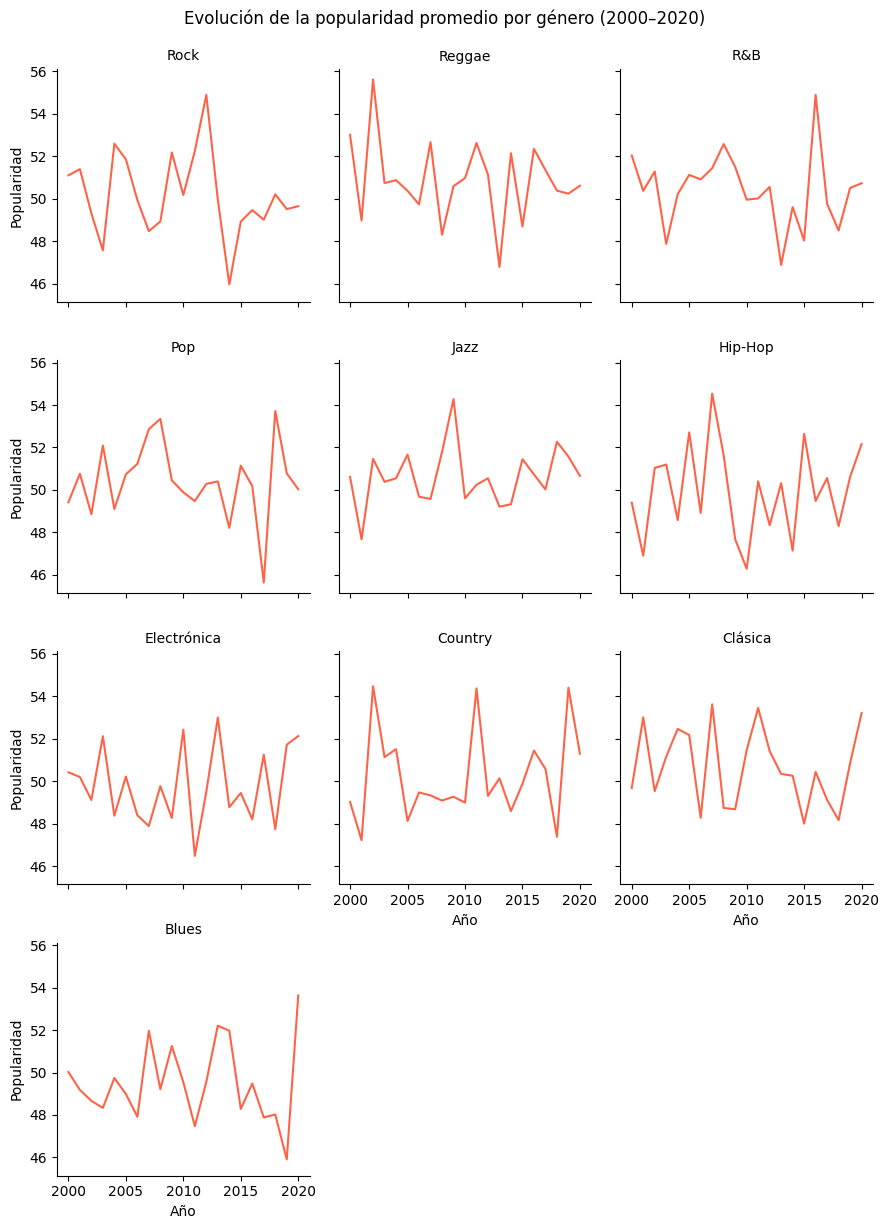

In [20]:
g = sns.FacetGrid(df_clean, col="Género", col_wrap=3, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x="Año", y="Popularidad", estimator="mean", errorbar=None, color="tomato")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Año", "Popularidad")
g.fig.suptitle("Evolución de la popularidad promedio por género (2000–2020)", y=1.02)
plt.show()


# Conclusión General

El análisis del conjunto de **50 000 canciones** publicadas entre los años **2000 y 2020** permitió obtener una visión integral sobre la evolución musical de las últimas dos décadas.  
El dataset se destaca por su **amplitud, diversidad y equilibrio**, abarcando diez géneros musicales y un período de veinte años, lo que garantiza una base sólida para el análisis.

---

A partir de los resultados obtenidos en el análisis, se formulan y responden a continuación **tres preguntas claves** orientadas a profundizar en el comportamiento y las características de las canciones del período 2000–2020.

## 1. ¿Qué género musical presenta mayor popularidad promedio?

El análisis revela que los géneros **Pop**, **R&B** y **Electrónica** concentran las **mayores medias de popularidad**, manteniéndose como los estilos dominantes del mercado musical contemporáneo.  
Estos géneros muestran una presencia constante y capacidad de adaptación frente a las transformaciones digitales del sector.  

En contraste, **Rock** y **Clásica** presentan niveles de popularidad más bajos, lo que puede asociarse a un público más reducido o a una menor presencia en plataformas de streaming.

---

## 2. ¿Cómo ha evolucionado la popularidad de los géneros entre 2000 y 2020?

La evolución temporal muestra un **crecimiento sostenido** en géneros como **Hip-Hop**, **Electrónica** y **Reggae**, que ganan protagonismo en la segunda década del período analizado.  
Por el contrario, estilos más tradicionales como **Jazz** y **Clásica** mantienen una popularidad estable pero sin grandes variaciones, mientras que **Rock** evidencia una leve tendencia descendente.

Este comportamiento refleja un cambio en las preferencias del público impulsado por la **digitalización** y la **globalización del consumo musical**.

---

## 3. ¿Existe relación entre la duración de una canción y su nivel de popularidad?

El análisis de dispersión entre **duración** y **popularidad** muestra **ausencia de correlación significativa**.  
Las canciones más exitosas pueden tener cualquier duración dentro del rango habitual (2 a 5 minutos), lo que indica que la duración **no determina el nivel de éxito**.  
Esto refuerza la idea de que la popularidad depende de factores externos como la **difusión mediática**, el **marketing digital** o el **impacto viral** en redes.

---

## Conclusión General

En conjunto, los resultados evidencian que el dataset es **representativo y equilibrado**, permitiendo observar patrones y tendencias de largo plazo.  
Las canciones mantienen una **duración promedio de 3 minutos y medio**, un **volumen de lanzamientos estable por año** y una **distribución equilibrada de popularidad** entre géneros.

El análisis sugiere que entre **2000 y 2020** la música experimentó una **transición estructural**: los géneros urbanos y electrónicos ganaron protagonismo, mientras los estilos clásicos conservaron su espacio sin grandes variaciones.  
Este proceso refleja el impacto de la **era digital**, donde las plataformas de streaming, la globalización cultural y las nuevas dinámicas de promoción redefinieron el concepto de éxito musical.

En definitiva, este estudio constituye una base sólida para futuras investigaciones sobre **tendencias, popularidad y evolución del mercado musical global**.
